## II. ANALYZING AIR QUALITY IN BANGKOK [EXERCISE]
We want in this exercise to analyze air quality data in Bangkok provided by the **`OpenAQ`** platform.

> "OpenAQ is the world's first open, real-time and historical air quality platform, aggregating government-measured and research-grade data - entirely open-source. To do so, we will access to crowd-sourced data"

For further information: https://github.com/openaq/openaq-info/blob/master/FAQ.md#whatis

While illustrating typical steps of a data analysis workflow: data loading, data transformation, Exploratory Data Analysis (EDA) and specific Python's tools/techniques, this notebook will as well allow to draw attention to important aspects of data analysis such as missing values handling and data validation.

In [2]:
import pandas as pd
import requests
import folium
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

If you get an error after executing the previous cell, install required packages if needed.

## 1. Loading the data
**`OpenAQ`** API documention can be accessed here: https://docs.openaq.org/

To load the data you need to pass the appropriate URL to the 

`requests.get(url)` method.

In our cases, we want all measurements taken in Bangkok in a specific period.

In [40]:
### START CODE HERE ### (≈1 line)
# Call 'requests.get(...)' and assign to 'r'
r = None
### END CODE HERE ###

In [ ]:
# Print returned json and check its structure
print(r.json())

In [38]:
# Retrieving the 'results' only ()
json_data = r.json()['results']

In [ ]:
print(json_data)

We've already seen that Pandas dataframe type is very convenient for data analysis. If you pass a list of dictionnary to the Pandas method: 

`pd.DataFrame(list_of_dict)`

with for instance 

`list_of_dict=[{'param': 'pm10', 'value': 40}, {'param': 'pm2.5', 'value': 30}, ...]`

then you would get a Pandas dataframe with ['param', 'value'] columns.

When you print, `json_data` you notice that each element of the list have not the appropriate structure (nested dictionaries, ...). As a result, we need to iterate over this initial list to create the structure we want.

In the cell below, you need:
* to iterate over the list,
* create a single row and,
* append it to 'the rows_list' list

In [42]:
rows_list = []

for m in json_data:
    row = {'city': m['city'],
           'lon': m['coordinates']['longitude'],
           'lat': m['coordinates']['latitude'],
           'time': m['date']['local'],
           'loc': m['location'],
           'param': m['parameter'],
           'unit': m['unit'],
           'value': m['value']
          }

    ### START CODE HERE ### (≈1 line)
    # Append row to rows_list
    
    ### END CODE HERE ###

In [ ]:
print(rows_list)

In [45]:
# Now to create a Dataframe, simply:
data = pd.DataFrame(rows_list) 

# Here we simply reorder the columns in a prefered way
data = data[['city','lon','lat','time','loc','param','unit','value']]

In [46]:
### START CODE HERE ### (≈1 line)
# Print the shape of data
    
### END CODE HERE ###

In [47]:
### START CODE HERE ### (≈1 line)
# Print the first 5 rows of data
    
### END CODE HERE ###

## 2. Getting acquainted with the data
Now we've loaded the data and structured in your wanted way, it is time to get a quick look at it.

### Counts per values

As a first approach, we would like to answer the following questions:
* how many locations and how many measurements collected for each?
* what king of parameters have been measured and how much?
* what are the various units used?

To have the count of rows per category, you can simply call the `.value_counts()` method on a column of interest of your dataframe.

In [53]:
### START CODE HERE ### (≈1 line)
# Get the list of location and number of measurements carried out for each of them.
    
### END CODE HERE ###

Usually, as soon as you start copying and pasting a snippet of code, this is a good signal to write a function. Below, we've created an ad hoc function allowing to factorize the code and get the counts of row/measurements by value (for instance location) for a list of column names. 

In [54]:
def count_by(df, col_name):
    print('-'*30)
    print('# of measurements by: "' + col_name + '"\n\n', df[col_name].value_counts())

In [55]:
for c in ['city', 'loc', 'param', 'unit']:
    count_by(data, c)

------------------------------
# of measurements by: "city"

 Bangkok    10000
Name: city, dtype: int64
------------------------------
# of measurements by: "loc"

 Intarapitak Rd., Thon Buri       2054
Bangna, Bangna                   1869
Samae Dam, Bang Khun Thian       1649
Khlong Chan, Bang kapi           1437
Lat Phrao Rd., Wang Thonglang    1393
Rama IV Rd., Pathum Wan          1176
Chong Nonsi, Yannawa              372
Pubpla, Wang Thonglang             43
Samsen Nai, Khet Phaya Thai         7
Name: loc, dtype: int64
------------------------------
# of measurements by: "param"

 no2     2718
pm10    2700
co      1987
o3      1718
so2      877
Name: param, dtype: int64
------------------------------
# of measurements by: "unit"

 ppm      7300
µg/m³    2700
Name: unit, dtype: int64


### Mapping measurement locations
To create map in Python and Jupyter notebook, various solutions are available. We outline below simple steps to get a quick map of measurement stations. 

Looking at the documentation below, feel free to further elaborate the basic map plotted (for instance, update the radius of circles based on measurement statistics, ...).

In [9]:
# https://folium.readthedocs.io/en/latest/quickstart.html#getting-started
# https://deparkes.co.uk/2016/06/10/folium-map-tiles/
# http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [10]:
map_loc = folium.Map(location=[13.7563, 100.5018], tiles='cartodbpositron', zoom_start=11)

In [11]:
# Locations of interest
data[['loc', 'lon', 'lat']].drop_duplicates()

,loc,lon,lat
0,"Intarapitak Rd., Thon Buri",100.486604,13.727559
2,"Bangna, Bangna",100.605741,13.666116
5,"Samae Dam, Bang Khun Thian",100.505812,13.668461
11,"Chong Nonsi, Yannawa",100.547345,13.708041
18,"Rama IV Rd., Pathum Wan",100.536494,13.729830
30,"Khlong Chan, Bang kapi",100.636548,13.781520
39,"Lat Phrao Rd., Wang Thonglang",100.596078,13.792635
155,"Pubpla, Wang Thonglang",100.614562,13.769630
7074,"Samsen Nai, Khet Phaya Thai",100.537798,13.780444


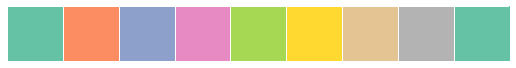

In [12]:
nb_loc = len(data[['loc', 'lon', 'lat']].drop_duplicates())
color_palette = sns.color_palette("Set2", nb_loc)
sns.palplot(color_palette)

In [13]:
col_idx = 0
for row in data[['loc', 'lon', 'lat']].drop_duplicates().itertuples():
    location, lon, lat = row[1:4]
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup='<i>' + location + '</i>',
                        color=color_palette.as_hex()[col_idx],
                        fill=True,
                        fill_color=color_palette.as_hex()[col_idx],
                        fill_opacity=0.8,
                        line_opacity=0.8
                       ).add_to(map_loc)
    col_idx += 1

In [56]:
map_loc

## 3. Data analyis | the case of Particulate Matter 10 [pm10]
According to various international/regional organization (see for instance WHO guidelines http://www.who.int/mediacentre/factsheets/fs313/en/), the limit exposure to small particulate matter of 10 microns or less in diameter (PM10) should not exceed: 
* the limit daily average per day of 50 μg/m3
* the limit yearly average per day of 40 μg/m3

Based on the fetched data, we would like to see, and calculate the daily average of PM10 concentation.

In [57]:
# We subset the data where parameter measured is 'pm10'
pm10 = data[data.param == 'pm10']

In [58]:
pm10.head()

,city,lon,lat,time,loc,param,unit,value
3,Bangkok,100.486604,13.727559,2017-11-21T16:00:00+07:00,"Intarapitak Rd., Thon Buri",pm10,µg/m³,27.0
4,Bangkok,100.605741,13.666116,2017-11-21T16:00:00+07:00,"Bangna, Bangna",pm10,µg/m³,26.0
14,Bangkok,100.505812,13.668461,2017-11-21T16:00:00+07:00,"Samae Dam, Bang Khun Thian",pm10,µg/m³,28.0
21,Bangkok,100.536494,13.729830,2017-11-21T15:00:00+07:00,"Rama IV Rd., Pathum Wan",pm10,µg/m³,35.0
25,Bangkok,100.547345,13.708041,2017-11-21T15:00:00+07:00,"Chong Nonsi, Yannawa",pm10,µg/m³,21.0


In [59]:
### START CODE HERE ### (≈1 line)
# Get an histogram of pm10 values

### END CODE HERE ###

In [60]:
# we assign here the list of locations of interest to `locations` var
locations = data[['loc', 'lon', 'lat']].drop_duplicates()['loc'].values

In [62]:
print(locations)

['Intarapitak Rd., Thon Buri' 'Bangna, Bangna' 'Samae Dam, Bang Khun Thian'
 'Chong Nonsi, Yannawa' 'Rama IV Rd., Pathum Wan' 'Khlong Chan, Bang kapi'
 'Lat Phrao Rd., Wang Thonglang' 'Pubpla, Wang Thonglang'
 'Samsen Nai, Khet Phaya Thai']


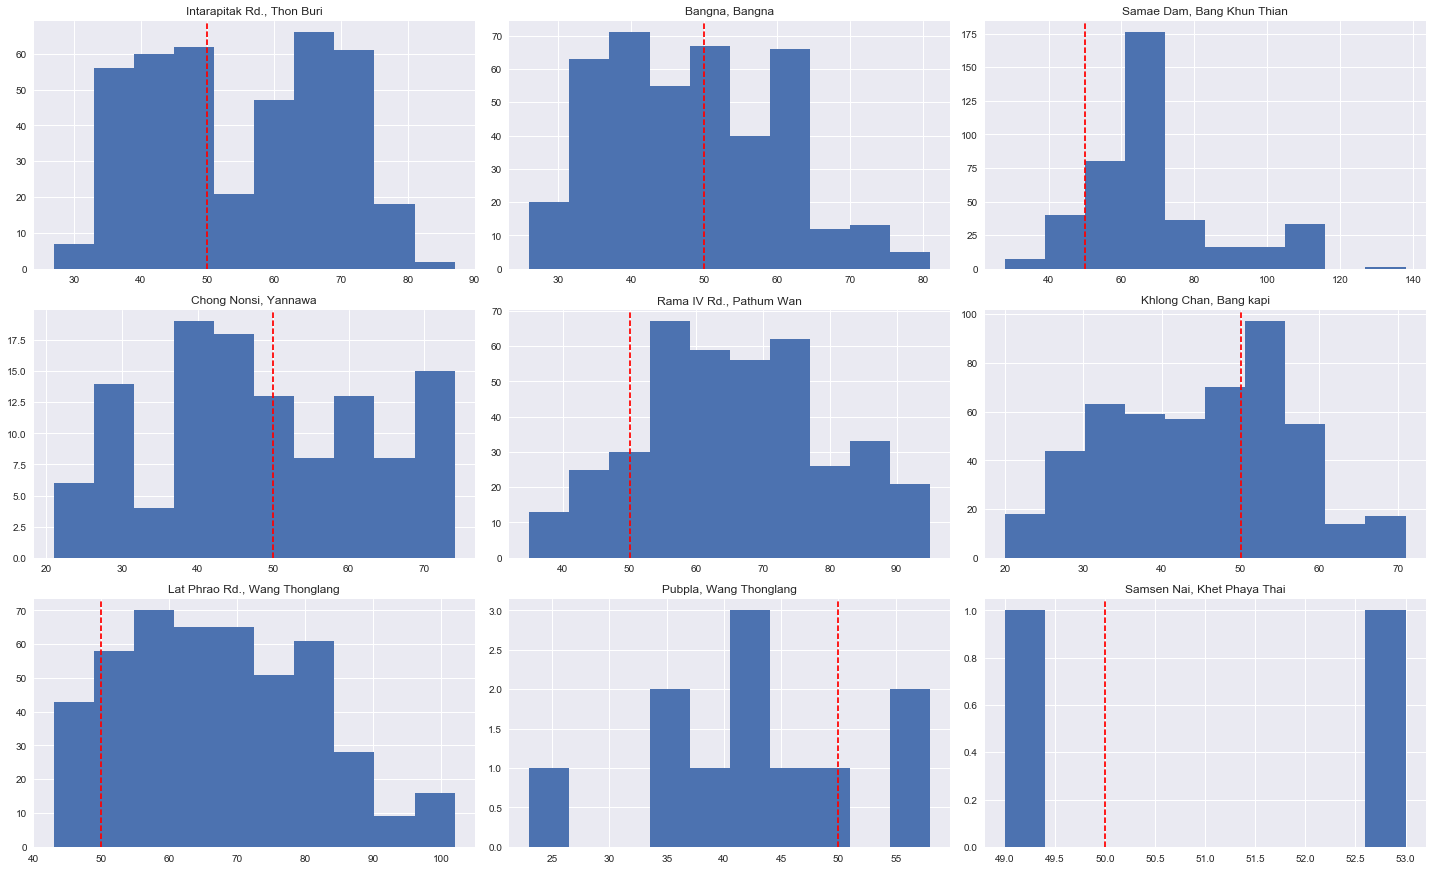

In [63]:
# Study carefully this code snippet in order to see how to plot sytematically histograms for all locations
plt.rcParams['figure.figsize'] = (20, 20)
def draw_histograms_by_loc(n_rows, n_cols):
    locations = data[['loc', 'lon', 'lat']].drop_duplicates()['loc'].values
    fig = plt.figure()
    for i, loc in enumerate(locations):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        pm10[pm10['loc'] == loc]['value'].hist(bins=10, ax=ax)
        plt.axvline(x=50, color='r', linestyle='--')
        ax.set_title(loc)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms_by_loc(5, 3)

### Exploring time dimensions

In [64]:
pm10.head(5)

,city,lon,lat,time,loc,param,unit,value
3,Bangkok,100.486604,13.727559,2017-11-21T16:00:00+07:00,"Intarapitak Rd., Thon Buri",pm10,µg/m³,27.0
4,Bangkok,100.605741,13.666116,2017-11-21T16:00:00+07:00,"Bangna, Bangna",pm10,µg/m³,26.0
14,Bangkok,100.505812,13.668461,2017-11-21T16:00:00+07:00,"Samae Dam, Bang Khun Thian",pm10,µg/m³,28.0
21,Bangkok,100.536494,13.729830,2017-11-21T15:00:00+07:00,"Rama IV Rd., Pathum Wan",pm10,µg/m³,35.0
25,Bangkok,100.547345,13.708041,2017-11-21T15:00:00+07:00,"Chong Nonsi, Yannawa",pm10,µg/m³,21.0


In [ ]:
### START CODE HERE ### (≈2-3 lines)
# Instead of data structure below, to simplify time series plotting
# we'd like to rotate the dataframe to get the following structure:
#
#      time,'Intarapitak Rd.', 'Thon Buri', ... (other location's name)
#      2017-11-21 09:00:00,27.3,34.2, ...
#
#  with time column as index
#  Assign the rotated dataframe to the variable `pm10_rot`
# 
pm10_rot = None
### END CODE HERE ###

In [ ]:
# Below, we plot the time series of all locations
plt.rcParams['figure.figsize'] = (16, 16)
pm10_rot.plot(subplots=True)

In [ ]:
### START CODE HERE ### (≈1 line)
# Resample the newly/rotated data frame on a daily basis and get the mean of measurements
# You can do so by using the `.resample('D').mean()` chained method on a dataframe

### END CODE HERE ###

### Bonus questions

1. How to deal with missing values?
2. What is the # of days where daily limit exceed 50μg/day over the period considered?
3. How trustable are the data you fetched?
4. ...